In [32]:
import blimpy
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.colors
import h5py
%matplotlib inline

In [33]:
"""Loading files into Waterfall and naming to respective observation number. Also loading each file info into a
dictionary. This will allow us to pull the title of the observation from the dictionary."""
def h5_header_wrapper(filename):
    """Gets header of a .h5 file."""
    h = h5py.File(filename)
    header = dict(h['data'].attrs.items())
    return header
filepath1 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_54573_Hip66704_0003.gpuspec.0000.h5'
filepath2 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_54910_Hip65678_0004.gpuspec.0000.h5'
filepath3 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_55247_Hip66704_0005.gpuspec.0000.h5'
filepath4 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_55588_Hip65946_0006.gpuspec.0000.h5'
filepath5 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_55929_Hip66704_0007.gpuspec.0000.h5'
filepath6 = '../HIP66704/spliced_blc0001020304050607_guppi_57650_56272_Hip66192_0008.gpuspec.0000.h5'
waterfall1 = blimpy.Waterfall(filepath1)
waterfall2 = blimpy.Waterfall(filepath2)
waterfall3 = blimpy.Waterfall(filepath3)
waterfall4 = blimpy.Waterfall(filepath4)
waterfall5 = blimpy.Waterfall(filepath5)
waterfall6 = blimpy.Waterfall(filepath6)
hd1 = h5_header_wrapper(filepath1)
hd2 = h5_header_wrapper(filepath2)
hd3 = h5_header_wrapper(filepath3)
hd4 = h5_header_wrapper(filepath4)
hd5 = h5_header_wrapper(filepath5)
hd6 = h5_header_wrapper(filepath6)
titles = [str(hd1['source_name']), str(hd2['source_name']), str(hd3['source_name']), str(hd4['source_name']), str(hd5['source_name']), str(hd6['source_name'])]
titles = [titles[0][2:-1].upper(), titles[1][2:-1].upper(), titles[2][2:-1].upper(), titles[3][2:-1].upper(), titles[4][2:-1].upper(), titles[5][2:-1].upper()]

In [34]:
"""Logging times and freqs of each observation into respective variable names, times# and freqs#."""
times1 = waterfall1.populate_timestamps()
times2 = waterfall2.populate_timestamps()
times3 = waterfall3.populate_timestamps()
times4 = waterfall4.populate_timestamps()
times5 = waterfall5.populate_timestamps()
times6 = waterfall6.populate_timestamps()
freqs1 = waterfall1.populate_freqs()
freqs2 = waterfall2.populate_freqs()
freqs3 = waterfall3.populate_freqs()
freqs4 = waterfall4.populate_freqs()
freqs5 = waterfall5.populate_freqs()
freqs6 = waterfall6.populate_freqs()
"""Logging the power data of each file into its corresponding variable name"""
data1comp = waterfall1.data[:, 0, :]
data2comp = waterfall2.data[:, 0, :]
data3comp = waterfall3.data[:, 0, :]
data4comp = waterfall4.data[:, 0, :]
data5comp = waterfall5.data[:, 0, :]
data6comp = waterfall6.data[:, 0, :]
data = [data1comp, data2comp, data3comp, data4comp, data5comp, data6comp]

In [35]:
"""Converting timestamps into seconds elapsed since first observation"""
def elapsedTime(times):
    timesElapsedDays = times - times[0]
    timesElapsedSeconds = timesElapsedDays * 86400
    return(timesElapsedSeconds)

telapsed1 = elapsedTime(times1)
telapsed2 = elapsedTime(times2)
telapsed3 = elapsedTime(times3)
telapsed4 = elapsedTime(times4)
telapsed5 = elapsedTime(times5)
telapsed6 = elapsedTime(times6)

In [36]:
"""extracting the time and frequency of each power datapoint. obsNumber corresponds to filepath number (1-6).
Indexing in python starts from 0!!!!!"""
def locateTime(obsNumber, vertIndex):
    if obsNumber == 1:
        time = telapsed1[vertIndex]
    elif obsNumber == 2:
        time = telapsed2[vertIndex]
    elif obsNumber == 3:
        time = telapsed3[vertIndex]
    elif obsNumber == 4:
        time = telapsed4[vertIndex]
    elif obsNumber == 5:
        time = telapsed5[vertIndex]
    elif obsNumber == 6:
        time = telapsed6[vertIndex]
    return(time)

def locateFreq(obsNumber, horizIndex):
    if obsNumber == 1:
        freq = freqs1[horizIndex]
    elif obsNumber == 2:
        freq = freqs2[horizIndex]
    elif obsNumber == 3:
        freq = freqs3[horizIndex]
    elif obsNumber == 4:
        freq = freqs4[horizIndex]
    elif obsNumber == 5:
        freq = freqs5[horizIndex]
    elif obsNumber == 6:
        freq = freqs6[horizIndex]
    return(freq)

"""Finding the time and freq for every data entry and putting them into a separate list. Input for function should
be data#comp. Remember horizDim corresponds to freq. vertDim corresponds to time."""
def reorganizingAllAsList(data, obsNumber):
    plotTime = []
    plotFreqs = []
    dataAsList = []
    horizDim = data.shape[1]
    vertDim = data.shape[0]
    for i in range(vertDim):
        for j in range(horizDim):
            plotTime.append(locateTime(obsNumber, i))
            plotFreqs.append(locateFreq(obsNumber, j))
            dataAsList.append(data[i, j])
    return(plotFreqs, plotTime, dataAsList)

def reorganizingAllAsArray(data, obsNumber):
    plotFreqs, plotTime, dataAsList = reorganizingAllAsList(data, obsNumber)
    dataAsArray = np.array(dataAsList).reshape(16, 71583)
    plotFreqsArray = np.array(plotFreqs).reshape(16, 71583)
    plotTimeArray = np.array(plotTime).reshape(16, 71583)
    return(plotFreqsArray, plotTimeArray, dataAsArray)

In [47]:
"""Replotting the waterfall plots of all 6 filepaths and arranging each off obs corresponding to its on obs"""
def rePlot6Plots():
    plt.rc('text', usetex=True)
    plt.rc('font', size = 16, family='serif')
    plt.rc('axes', titlesize = 16, labelsize = 16)
    plt.rc('xtick', labelsize = 15)
    plt.rc('ytick', labelsize = 15)
    onData1, offData1, onData2, offData2, onData3, offData3 = data[0], data[1], data[2], data[3], data[4], data[5]
    title1, title2, title3, title4, title5, title6 = titles[0], titles[1], titles[2], titles[3], titles[4], titles[5]
    fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (19, 10))
    """onObservation1 plot"""
    freq1Array, time1Array, onData1Array = reorganizingAllAsArray(onData1, 1)
    onO1 = plt.subplot(2, 3, 1)
    onO1.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    onO1.set_xlim([np.amin(freq1Array), np.amax(freq1Array)])
    onO1.set_ylim([np.amin(time1Array), np.amax(time1Array)])
    onO1.set_xlabel('Frequency [MHz]')
    onO1.set_ylabel('Time [s]')
    onO1.set_title(title1)
    onO1_contour = plt.contourf(freq1Array, time1Array, onData1Array, cmap = 'viridis')
    """Setting the colorbar for the on graph"""
    norm = matplotlib.colors.Normalize(vmin=onO1_contour.cvalues.min(), vmax=onO1_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = onO1_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = onO1_contour.levels)
    """offObservation1 plot"""
    freq2Array, time2Array, offData1Array = reorganizingAllAsArray(offData1, 2)
    offO1 = plt.subplot(2, 3, 4)
    offO1.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    offO1.set_xlim([np.amin(freq2Array), np.amax(freq2Array)])
    offO1.set_ylim([np.amin(time2Array), np.amax(time2Array)])
    offO1.set_xlabel('Frequency [MHz]') #setting the x axis of off graph
    offO1.set_ylabel('Time [s]') #setting the y axis of off graph
    offO1.set_title(title2)
    offO1_contour = plt.contourf(freq2Array, time2Array, offData1Array)
    """Setting the colorbar for the off graph"""
    norm = matplotlib.colors.Normalize(vmin=offO1_contour.cvalues.min(), vmax=offO1_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = offO1_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = offO1_contour.levels)
    """onObservation2 plot"""
    freq3Array, time3Array, onData2Array = reorganizingAllAsArray(onData2, 3)
    onO2 = plt.subplot(2, 3, 2)
    onO2.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    onO2.set_xlim([np.amin(freq3Array), np.amax(freq3Array)])
    onO2.set_ylim([np.amin(time3Array), np.amax(time3Array)])
    onO2.set_xlabel('Frequency [MHz]')
    onO2.set_ylabel('Time [s]')
    onO2.set_title(title3)
    onO2_contour = plt.contourf(freq3Array, time3Array, onData2Array, cmap = 'viridis')
    """Setting the colorbar for the on graph"""
    norm = matplotlib.colors.Normalize(vmin=onO1_contour.cvalues.min(), vmax=onO1_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = onO1_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = onO1_contour.levels)
    """offObservation2 plot"""
    freq4Array, time4Array, offData2Array = reorganizingAllAsArray(offData2, 4)
    offO2 = plt.subplot(2, 3, 5)
    offO2.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    offO2.set_xlim([np.amin(freq4Array), np.amax(freq4Array)])
    offO2.set_ylim([np.amin(time4Array), np.amax(time4Array)])
    offO2.set_xlabel('Frequency [MHz]') #setting the x axis of off graph
    offO2.set_ylabel('Time [s]') #setting the y axis of off graph
    offO2.set_title(title4)
    offO2_contour = plt.contourf(freq4Array, time4Array, offData2Array)
    """Setting the colorbar for the off graph"""
    norm = matplotlib.colors.Normalize(vmin=offO2_contour.cvalues.min(), vmax=offO2_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = offO2_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = offO2_contour.levels)
    """onObservation3 plot"""
    freq5Array, time5Array, onData3Array = reorganizingAllAsArray(onData3, 5)
    onO3 = plt.subplot(2, 3, 3)
    onO3.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    onO3.set_xlim([np.amin(freq5Array), np.amax(freq5Array)])
    onO3.set_ylim([np.amin(time5Array), np.amax(time5Array)])
    onO3.set_xlabel('Frequency [MHz]')
    onO3.set_ylabel('Time [s]')
    onO3.set_title(title5)
    onO3_contour = plt.contourf(freq5Array, time5Array, onData3Array, cmap = 'viridis')
    """Setting the colorbar for the on graph"""
    norm = matplotlib.colors.Normalize(vmin=onO3_contour.cvalues.min(), vmax=onO3_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = onO3_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = onO3_contour.levels)
    """offObservation3 plot"""
    freq6Array, time6Array, offData3Array = reorganizingAllAsArray(offData3, 6)
    offO3 = plt.subplot(2, 3, 6)
    offO3.set_xticks([2251.30, 2251.35, 2251.40, 2251.45])
    offO3.set_xlim([np.amin(freq6Array), np.amax(freq6Array)])
    offO3.set_ylim([np.amin(time6Array), np.amax(time6Array)])
    offO3.set_xlabel('Frequency [MHz]') #setting the x axis of off graph
    offO3.set_ylabel('Time [s]') #setting the y axis of off graph
    offO3.set_title(title6)
    offO3_contour = plt.contourf(freq6Array, time6Array, offData3Array)
    """Setting the colorbar for the off graph"""
    norm = matplotlib.colors.Normalize(vmin=offO3_contour.cvalues.min(), vmax=offO3_contour.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = offO3_contour.cmap)
    sm.set_array([])
    plt.colorbar(sm, ticks = offO3_contour.levels)
    fig.tight_layout()
    fig.savefig(titles[0] + '_6plots.png', dpi = 600)

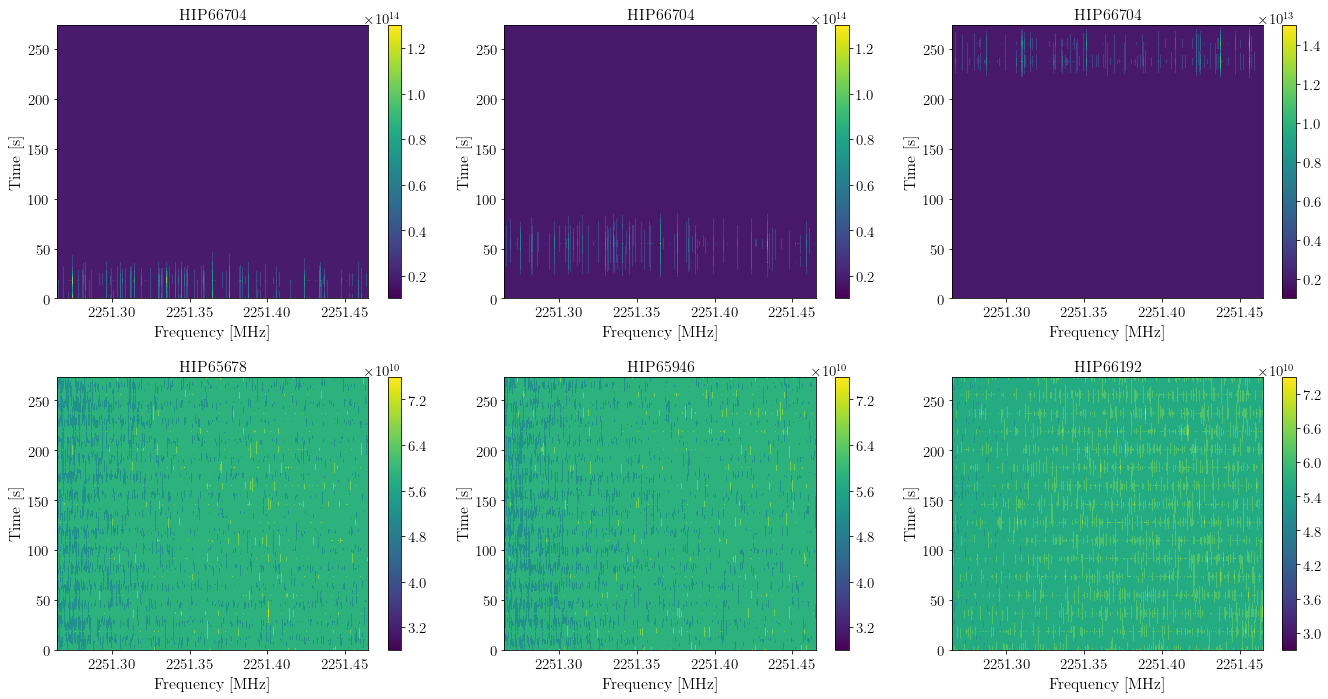

In [48]:
rePlot6Plots()